In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "C:\\Jehyeon\\Portfolio-Optimization-2023-FR-Project-\\Data\\"

In [3]:
year = "2022"

rtn = pd.read_pickle(f"{path}allstock_reduced.pickle").abs().pct_change(fill_method=None).loc[year]
mask = pd.read_pickle(f"{path}spx_mask.pickle").loc[year].iloc[-1] # 마지막 날만 가져온다

In [4]:
# 2022년 마지막날의 S&P500 구성 종목을 가져오기 위해서 기업의 리스트를 뽑는다
col = mask.dropna().index
len(col)

503

In [5]:
# S&P500 구성종목만 가져온다 (1년간 주가가 전부 있는 주식)
sp500 = rtn.loc[:,col].dropna(axis=1)
len(sp500.columns)

501

In [6]:
# corr_matrix 계산
cor_matrix = sp500.corr()
cor_matrix

PERMNO,14702,50876,60442,19502,59176,43350,64995,66181,66157,61735,...,89781,79452,17307,88182,17942,16581,86288,12476,82276,84262
PERMNO,,,,,,,,,,,,,,,,,,,,,
14702,1.000000,0.257517,0.598412,0.480831,0.617113,0.521505,0.602142,0.569076,0.536833,0.522403,...,0.264330,0.403232,0.536985,0.858179,0.351770,0.446253,0.542422,0.416810,0.386748,0.497450
50876,0.257517,1.000000,0.300793,0.290595,0.289358,0.168837,0.217562,0.377384,0.273531,0.465029,...,0.431674,0.398425,0.347140,0.249361,0.302571,0.380977,0.331647,0.224162,0.331646,0.272955
60442,0.598412,0.300793,1.000000,0.497517,0.725818,0.579667,0.882370,0.525963,0.789428,0.500386,...,0.207939,0.466587,0.520886,0.576075,0.440824,0.455648,0.405613,0.435367,0.560024,0.463160
19502,0.480831,0.290595,0.497517,1.000000,0.463077,0.483438,0.524403,0.502016,0.482124,0.413203,...,0.285549,0.427468,0.416306,0.395456,0.461953,0.410224,0.307388,0.376814,0.365354,0.386276
59176,0.617113,0.289358,0.725818,0.463077,1.000000,0.536397,0.705769,0.507297,0.673428,0.548816,...,0.256890,0.467482,0.613446,0.608841,0.436670,0.488481,0.471946,0.471253,0.526912,0.491330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16581,0.446253,0.380977,0.455648,0.410224,0.488481,0.414726,0.433264,0.470160,0.397988,0.510241,...,0.468524,0.781607,0.581577,0.428310,0.447106,1.000000,0.465756,0.398999,0.348390,0.402387
86288,0.542422,0.331647,0.405613,0.307388,0.471946,0.389203,0.414255,0.500104,0.356779,0.501639,...,0.343067,0.377228,0.486705,0.538445,0.269716,0.465756,1.000000,0.242757,0.320076,0.394763
12476,0.416810,0.224162,0.435367,0.376814,0.471253,0.300641,0.432063,0.299977,0.391938,0.328365,...,0.258381,0.425568,0.471033,0.429881,0.287568,0.398999,0.242757,1.000000,0.403371,0.465554


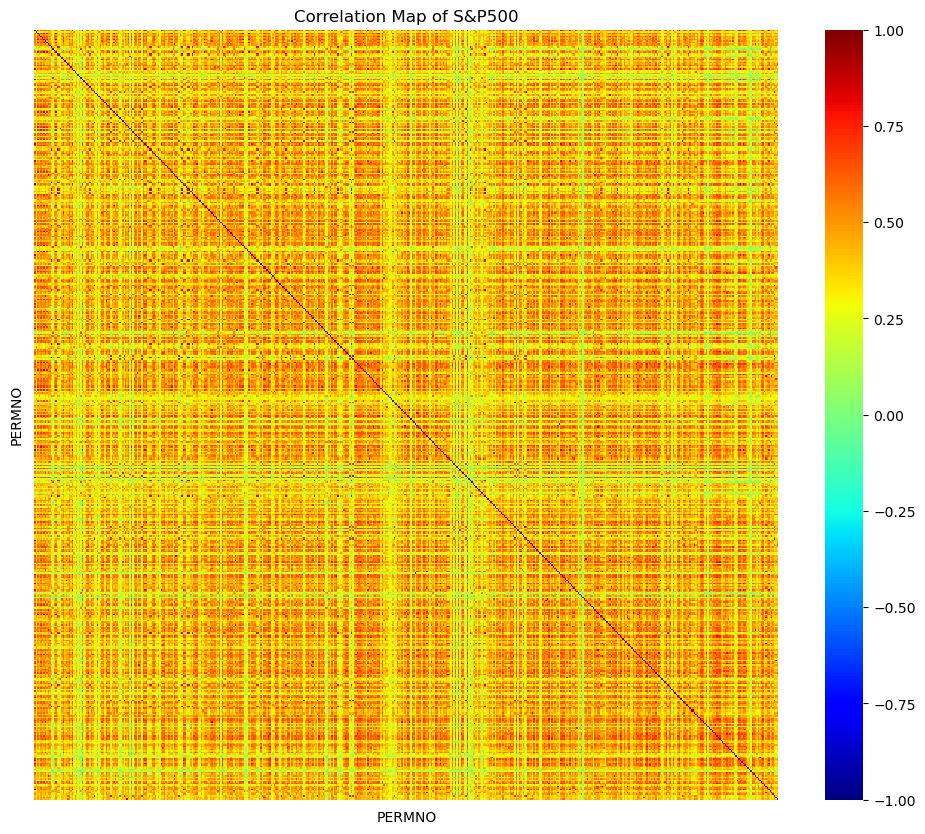

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(cor_matrix, 
            vmin=-1,
            vmax=1,
            cmap='jet', 
            xticklabels=False,
            yticklabels=False)

plt.title("Correlation Map of S&P500");

Clustering 해서 Corr Map도 뽑아보자

In [8]:
# Paper대로 T,N, 람다_+ 구현
t = len(sp500.index)
n = len(sp500.columns)
q = n/t 

lambda_plus = 1 + 2*(np.sqrt(q)) + q

In [9]:
# Cluster의 개수를 구하기(RMT 이론에 의해)
eigen_values = np.linalg.eigvalsh(cor_matrix)
k = (eigen_values > lambda_plus).sum()

In [10]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=k, 
               n_init=200,
               max_iter=1000)
kmean.fit(sp500.T)
label = kmean.labels_ #라벨의 순서는 cov_matrix의 (idx,col)순서와 동일하다

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


In [11]:
# within corr 구하기
within_corr_dict = {}

for i in range(k): # i는 클러스터를 의미
    mask = (label == i)
    card_cluster = mask.sum()
    cluster_corr = sp500.loc[:,mask].corr().values
    
    with_in_cluster = (cluster_corr - np.diag(np.diag(cluster_corr))).sum() / (card_cluster * (card_cluster-1))
    if np.isnan(with_in_cluster) == True:
        with_in_cluster = 0
    within_corr_dict[i] = with_in_cluster 

C:\Users\user\AppData\Local\Temp\ipykernel_10520\3857817749.py:9: RuntimeWarning: invalid value encountered in double_scalars
  with_in_cluster = (cluster_corr - np.diag(np.diag(cluster_corr))).sum() / (card_cluster * (card_cluster-1))


In [12]:
# between corr은 pair로 나와야함
between_corr_dict = {}

for i in range(k): # i는 클러스터를 의미
    mask_i = (label == i)
    card_i = mask_i.sum()
    stock_i = sp500.loc[:, mask_i]
    
    for j in range(k): # 클러스터 j를 뽑고
        if i == j:
            continue
        mask_j = (label == j)
        card_j = mask_j.sum()
        stock_j = sp500.loc[:, mask_j]
        
        all_corr = sp500.loc[:, mask_i+mask_j].corr().values
        all_corr_sum = (np.triu(all_corr) - np.diag(np.diag(all_corr))).sum()
        
        inner_corr_i = sp500.loc[:, mask_i].corr().values
        all_corr_sum_i = (np.triu(inner_corr_i) - np.diag(np.diag(inner_corr_i))).sum()        
        
        inner_corr_j = sp500.loc[:, mask_j].corr().values
        all_corr_sum_j = (np.triu(inner_corr_j) - np.diag(np.diag(inner_corr_j))).sum()   
        
        final_corr = all_corr_sum - all_corr_sum_i - all_corr_sum_j    
        
        between_cluster = final_corr / (2* card_i * card_j)
        between_corr_dict[(i,j)] = between_cluster

In [13]:
# Within Correlation으로 S를 (i,j) 원소에 채우기... (i,j는 하나의 클러스터에 포함됨...)
cor_matrix_cluster = pd.DataFrame(index=cor_matrix.index,
                                  columns=cor_matrix.columns)

for i in range(k): # i는 각 클러스터를 의미함
    mask = (label == i)
    within_corr = within_corr_dict[i] # 이 within_corr을 각 회사의 pair 자리에 채워야함
    
    # select the rows and columns corresponding to the True values
    selected_rows = cor_matrix_cluster.loc[mask, :]
    selected_cols = cor_matrix_cluster.loc[:, mask]
    # fill in the selected values with a specific value 
    selected_rows.loc[:, selected_cols.columns] = within_corr
    selected_cols.loc[selected_rows.index, :] = within_corr
    # update the original correlation matrix with the modified values
    cor_matrix_cluster.loc[mask, :] = selected_rows
    cor_matrix_cluster.loc[:, mask] = selected_cols

np.fill_diagonal(cor_matrix_cluster.values, 1) # 대각 행렬에 1을 채운다

C:\Users\user\AppData\Local\Temp\ipykernel_10520\1806642392.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows.loc[:, selected_cols.columns] = within_corr
C:\Users\user\AppData\Local\Temp\ipykernel_10520\1806642392.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_cols.loc[selected_rows.index, :] = within_corr


In [14]:
# Between corr으로 각 위치에 값을 채우기: 각 클러스터 p,q에서 pair에서 주식을 뽑고
## 주식 i, j자리에 행렬을 between corr으로 채운다

for (p,q), between_corr in between_corr_dict.items(): # p,q는 클러스터를 의미함
    mask_p = (label == p)
    mask_q = (label == q)
    
    for i,bol_i in enumerate(mask_p): # i,j는 각각 클러스터에서 기업의 bol값을 의미함
        if bol_i:
            for j, bol_j in enumerate(mask_q):
                if bol_j:
                    cor_matrix_cluster.iloc[i,j] = between_corr

In [15]:
alpha = 0.5

r = alpha * cor_matrix_cluster + (1-alpha) * cor_matrix

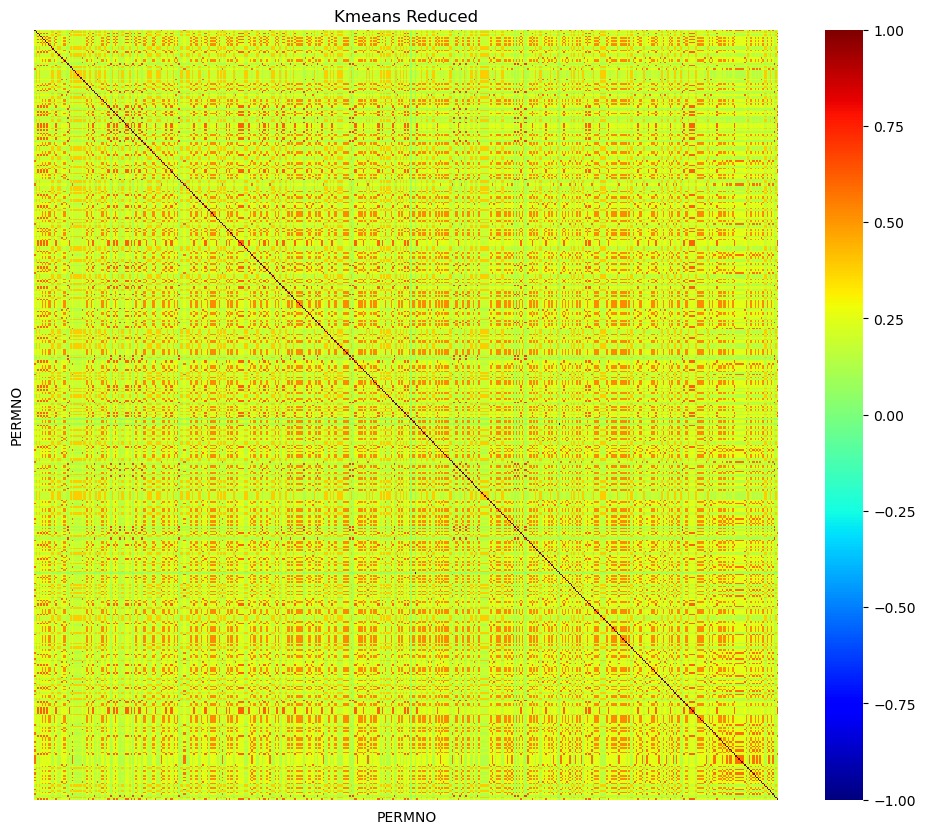

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(cor_matrix_cluster.astype("float64"), 
            vmin=-1,
            vmax=1,
            cmap='jet', 
            xticklabels=False,
            yticklabels=False)

plt.title("Kmeans Reduced");